<a href="https://colab.research.google.com/github/qayyumu/GradioExp/blob/main/SESSION_02_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classes & Module 📘
Python is an object oriented programming language.<br>
Almost everything in Python is an object, with its properties and methods.<br>
A Class is like an object constructor, or a "blueprint" for creating objects.<br>

In [1]:
!pip install requests

In [2]:
import requests
from bs4 import BeautifulSoup

class BaseScraper:
    def __init__(self, url):
        self.url = url

    def fetch_page(self):
        try:
            response = requests.get(self.url)
            if response.status_code == 200:
                return response.content
            else:
                print(f"Failed to retrieve page: {response.status_code}")
                return None
        except requests.RequestException as e:
            print(f"Error fetching page: {e}")
            return None


### Inheritance

In [3]:
class HTMLScraper(BaseScraper):
    def __init__(self, url):
        super().__init__(url)

    def scrape_content(self):
        html_content = self.fetch_page()
        if html_content:
            soup = BeautifulSoup(html_content, 'html.parser')
            # Example: Scraping titles
            titles = soup.find_all('h2')
            for title in titles:
                print(title.text.strip())

# Example usage:
url = 'https://www.webscraper.io/test-sites'
html_scraper = HTMLScraper(url)
html_scraper.scrape_content()

E-commerce site
E-commerce site with pagination links
E-commerce site with AJAX pagination links
E-commerce site with "Load more" buttons
E-commerce site that loads items while scrolling
Table playground


## Files and Directories 📁

### Read and write to a file

In [4]:
def write_to_file(file_name, data):
    try:
        with open(file_name, 'w') as file:
            file.write(data)
    except Exception as e:
        print("unable to read File")
        print(e)

write_to_file('test.txt', 'Cretating a file')


In [5]:
def read_file_content(file_name):
    try:
        with open(file_name, 'r') as file:
            print(file.read())
    except Exception as e:
        print("unable to read File")
        print(e)
read_file_content('test.txt')

Cretating a file


In [6]:
def write_to_file_improved(file_name, mode, data):
    try:
        with open(file_name, mode) as file:
            file.write(data)
    except Exception as e:
        print("unable to read File")
        print(e)
write_to_file_improved('test.txt', 'a','\nadded new data')
read_file_content('test.txt')

Cretating a file
added new data


### Iterate over files in directory

In [7]:
from pathlib import Path
# p = Path('../')
p = Path()
print(p.exists())
for file in p.glob('*.txt'):
    print(file)

###################################################
# Challenge: move one directory up in path and    #
# print the content of first .py file             #
# Hint:                                           #
# '.' represent current dir and '../' Parent      #
# to find .py file use p.globe("*.py") and then   #
# print data by using one of above give functions #
###################################################

True
test.txt


## External packages 📤

### Numpy
NumPy stands for Numerical Python.<br>
NumPy is a Python library used for working with arrays.<br>
It also has functions for working in domain of linear algebra, fourier transform, and matrices.<br>

    In Python we have lists that serve the purpose of arrays,
    but they are slow to process.
    NumPy aims to provide an array object that is up to 50x faster
    than traditional Python lists.
    The array object in NumPy is called ndarray, it provides a lot
    of supporting functions that make working with ndarray very easy.
    Arrays are very frequently used in data science, where speed and
    resources are very important.


In [8]:
import numpy as np

1D and 2D Arrays

In [9]:
x = np.array(100)
x1 = [100]
y = np.array([100])
print(x,x1,y,sep='\n')
print(f"Array-y, Shape:{y.shape} Dim:{y.ndim}")
print(f"Array, x-type:{type(x)} x1-type:{type(x1)} y-type:{type(y)}")

100
[100]
[100]
Array-y, Shape:(1,) Dim:1
Array, x-type:<class 'numpy.ndarray'> x1-type:<class 'list'> y-type:<class 'numpy.ndarray'>


In [10]:
y = np.array([100,200])
y1 = np.array([[100,200],[300,400]])
print(f"Array-y,y1, Shape:{y.shape} ,{y1.shape}")
print(f"Array-y,y1, ndim:{y.ndim} ,{y1.ndim}")
print(y1[0][0])

## Matrix -- rank 3 tensors
y1 = np.array([ [   [100,200],
                    [300,400] ],
                [   [100,200],
                    [300,400]] ])
print(f"Array-y1, Shape:{y1.shape} Dim,{y1.ndim}")
# Array Slicing
print(y1[0][0][1])
print(y1[0][:][:])
print(y1[1][:][:])
print("SUM array using numpy:")
print(y1.sum())
print("get array mean using numpy:")
print(y1.mean())

Array-y,y1, Shape:(2,) ,(2, 2)
Array-y,y1, ndim:1 ,2
100
Array-y1, Shape:(2, 2, 2) Dim,3
200
[[100 200]
 [300 400]]
[[100 200]
 [300 400]]
SUM array using numpy:
2000
get array mean using numpy:
250.0


generate Time series

In [11]:
import numpy as np
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)

### Pandas
Pandas is a Python library used for working with data sets.<br>
It has functions for analyzing, cleaning, exploring, and manipulating data.<br>
The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis" and was created by Wes McKinney in 2008.<br>
Usage:<br>

     - Is there a correlation between two or more columns?
     - What is average value?
     - Max value?
     - Min value?


Import Pandas

In [12]:
import numpy as np
import pandas as pd
##object creation
s = pd.Series([1,2,3,4,np.nan,6,7])
print(s)

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    6.0
6    7.0
dtype: float64


/Users/anaconda3/envs/torchEnv/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [13]:
dates = pd.date_range('20220110',periods=5)
print(dates)

DatetimeIndex(['2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14'],
              dtype='datetime64[ns]', freq='D')


In [14]:
### dataframe
df = pd.DataFrame(np.random.randn(5,5),index=dates,columns=list('ABCDE'))
print(df.info())
print(df.head())
print('pandas to numpy array', df.to_numpy())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2022-01-10 to 2022-01-14
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      float64
 1   B       5 non-null      float64
 2   C       5 non-null      float64
 3   D       5 non-null      float64
 4   E       5 non-null      float64
dtypes: float64(5)
memory usage: 240.0 bytes
None
                   A         B         C         D         E
2022-01-10 -2.242304  1.920414 -0.090006  1.224172 -0.667613
2022-01-11 -0.490078  0.228318  0.184258  0.830956 -1.886927
2022-01-12 -1.085932  1.050091 -1.056080 -1.266690 -0.521360
2022-01-13  0.417957  0.511069  0.094387 -1.176468  1.456020
2022-01-14  0.853302  2.123770  0.539041  0.654406 -2.456375
pandas to numpy array [[-2.24230398  1.92041407 -0.09000604  1.22417246 -0.66761255]
 [-0.49007849  0.22831753  0.1842582   0.83095627 -1.88692676]
 [-1.08593193  1.05009098 -1.05608029 -1.2666899

In [15]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20220110"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

print(df2.tail(2))
print(df2.columns)

     A          B    C  D      E    F
2  1.0 2022-01-10  1.0  3   test  foo
3  1.0 2022-01-10  1.0  3  train  foo
Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


### Matplot lib
Matplotlib is a low level graph plotting library in python that serves as a visualization utility.<br>
Matplotlib was created by John D. Hunter.<br>
Matplotlib is open source and we can use it freely.<br>

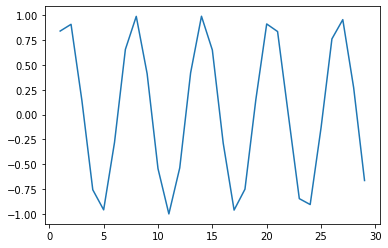

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos
xpoints = np.array(range(1,30))
ypoints = []
for i in xpoints:
    ypoints.append(sin(i))
# try using list comprehention
# ypoints = [sin(ypoint) for ypoint in xpoints]
plt.plot(xpoints, ypoints)
plt.show()

### Different types of graphs in matplotlib

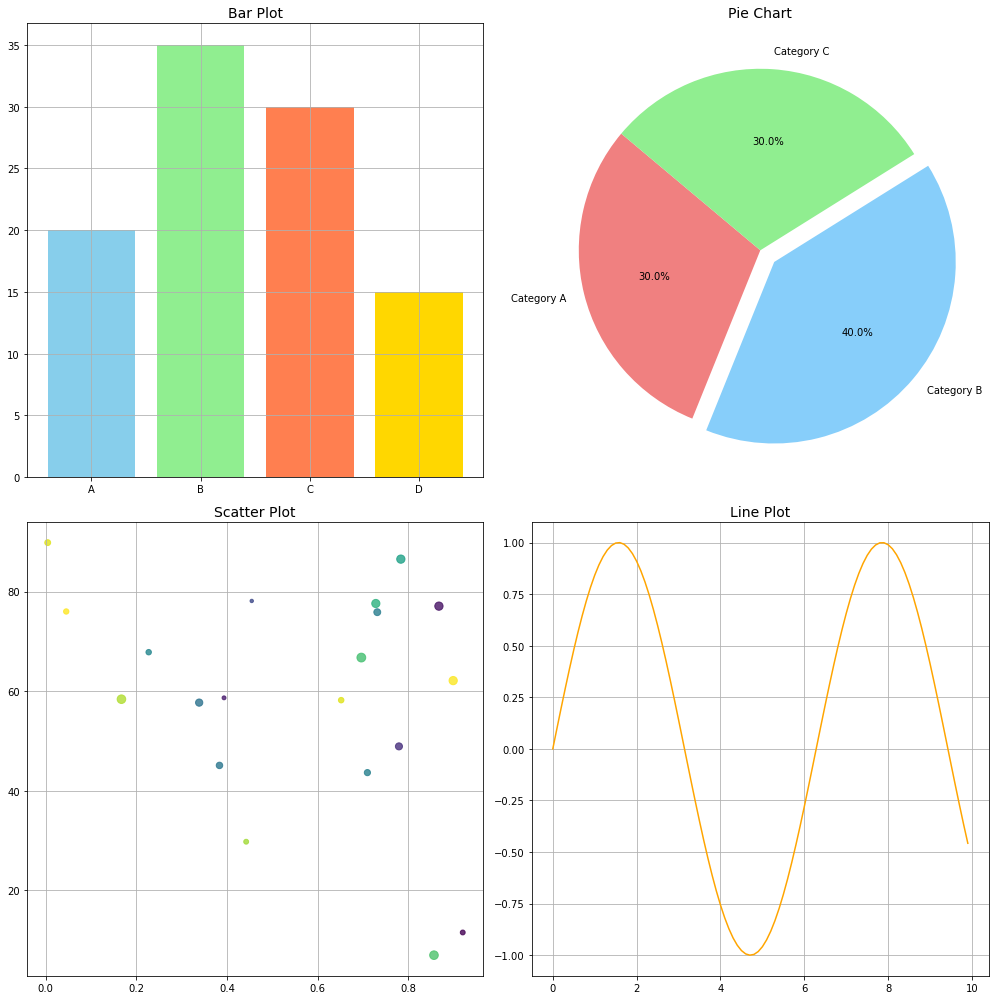

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data for different types of plots
plot_data = [
    {
        'title': 'Bar Plot',
        'data': {
            'Categories': ['A', 'B', 'C', 'D'],
            'Values': [20, 35, 30, 15]
        }
    },
    {
        'title': 'Pie Chart',
        'data': {
            'Labels': ['Category A', 'Category B', 'Category C'],
            'Sizes': [30, 40, 30],
            'Explode': (0, 0.1, 0)  # Explode second slice (Category B)
        }
    },
    {
        'title': 'Scatter Plot',
        'data': {
            'X': np.random.rand(20),
            'Y': np.random.rand(20) * 100,
            'Sizes': np.random.rand(20) * 100,
            'Colors': np.random.rand(20)
        }
    },
    {
        'title': 'Line Plot',
        'data': {
            'X': np.arange(0, 10, 0.1),
            'Y': np.sin(np.arange(0, 10, 0.1))
        }
    }
]

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

# Flatten axs array for easier indexing
axs = axs.flatten()

# Iterate through plot_data and plot each type of plot
for i, data in enumerate(plot_data):
    title = data['title']
    plot_data = data['data']

    if title == 'Bar Plot':
        # Bar Plot
        categories = plot_data['Categories']
        values = plot_data['Values']
        axs[i].bar(categories, values, color=['skyblue', 'lightgreen', 'coral', 'gold'])
        axs[i].set_title(title, fontsize=14)

    elif title == 'Pie Chart':
        # Pie Chart
        labels = plot_data['Labels']
        sizes = plot_data['Sizes']
        explode = plot_data['Explode']
        axs[i].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
        axs[i].set_title(title, fontsize=14)

    elif title == 'Scatter Plot':
        # Scatter Plot
        x = plot_data['X']
        y = plot_data['Y']
        sizes = plot_data['Sizes']
        colors = plot_data['Colors']
        axs[i].scatter(x, y, s=sizes, c=colors, cmap='viridis', alpha=0.8)
        axs[i].set_title(title, fontsize=14)

    elif title == 'Line Plot':
        # Line Plot
        x = plot_data['X']
        y = plot_data['Y']
        axs[i].plot(x, y, color='orange')
        axs[i].set_title(title, fontsize=14)

    axs[i].grid(True)

# Adjust layout and display the grid of plots
plt.tight_layout()
plt.show()


#### User Connectivity graph

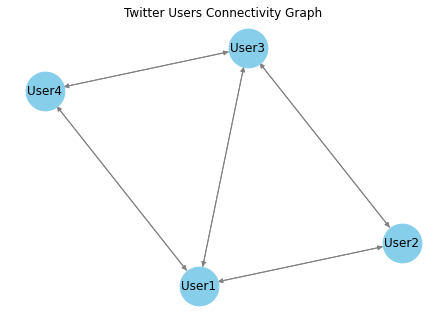

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

# Sample data: Twitter users and their connections (edges)
twitter_users = {
    'User1': ['User2', 'User3', 'User4'],
    'User2': ['User1', 'User3'],
    'User3': ['User1', 'User2', 'User4'],
    'User4': ['User1', 'User3']
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each user
for user in twitter_users:
    G.add_node(user)

# Add edges between users based on connections
for user, connections in twitter_users.items():
    for connection in connections:
        G.add_edge(user, connection)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_color='black', edge_color='gray')

# Display the graph
plt.title('Twitter Users Connectivity Graph')
plt.show()


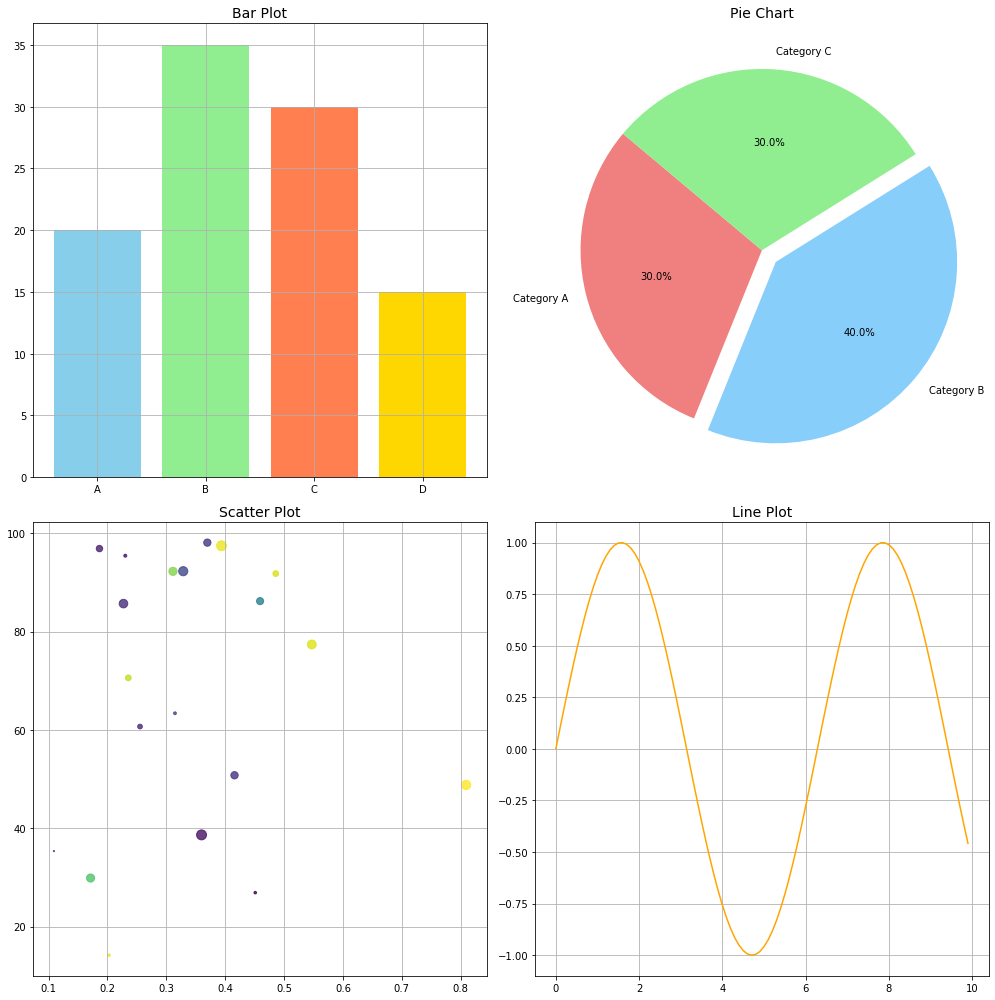

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data for different types of plots
plot_data = [
    {
        'title': 'Bar Plot',
        'data': {
            'Categories': ['A', 'B', 'C', 'D'],
            'Values': [20, 35, 30, 15]
        }
    },
    {
        'title': 'Pie Chart',
        'data': {
            'Labels': ['Category A', 'Category B', 'Category C'],
            'Sizes': [30, 40, 30],
            'Explode': (0, 0.1, 0)  # Explode second slice (Category B)
        }
    },
    {
        'title': 'Scatter Plot',
        'data': {
            'X': np.random.rand(20),
            'Y': np.random.rand(20) * 100,
            'Sizes': np.random.rand(20) * 100,
            'Colors': np.random.rand(20)
        }
    },
    {
        'title': 'Line Plot',
        'data': {
            'X': np.arange(0, 10, 0.1),
            'Y': np.sin(np.arange(0, 10, 0.1))
        }
    }
]

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

# Flatten axs array for easier indexing
axs = axs.flatten()

# Iterate through plot_data and plot each type of plot
for i, data in enumerate(plot_data):
    title = data['title']
    plot_data = data['data']

    if title == 'Bar Plot':
        # Bar Plot
        categories = plot_data['Categories']
        values = plot_data['Values']
        axs[i].bar(categories, values, color=['skyblue', 'lightgreen', 'coral', 'gold'])
        axs[i].set_title(title, fontsize=14)

    elif title == 'Pie Chart':
        # Pie Chart
        labels = plot_data['Labels']
        sizes = plot_data['Sizes']
        explode = plot_data['Explode']
        axs[i].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
        axs[i].set_title(title, fontsize=14)

    elif title == 'Scatter Plot':
        # Scatter Plot
        x = plot_data['X']
        y = plot_data['Y']
        sizes = plot_data['Sizes']
        colors = plot_data['Colors']
        axs[i].scatter(x, y, s=sizes, c=colors, cmap='viridis', alpha=0.8)
        axs[i].set_title(title, fontsize=14)

    elif title == 'Line Plot':
        # Line Plot
        x = plot_data['X']
        y = plot_data['Y']
        axs[i].plot(x, y, color='orange')
        axs[i].set_title(title, fontsize=14)

    axs[i].grid(True)

# Adjust layout and display the grid of plots
plt.tight_layout()
plt.show()


## Gradio


In [20]:
!pip install gradio 

In [22]:
import gradio as gr

def search_osint(query):
    return f"Searching OSINT for: {query}"

def upload_model(file):
    return f"Model uploaded: {file.name}"

def choose_algorithm(algorithm):
    return f"Selected algorithm: {algorithm}"

def set_parameters(params):
    return f"Set parameters: {params}"

def analyze_data(data_type):
    return f"Analyzing data type: {data_type}"

def display_results(file):
    return f"Displaying results from: {file.name}"

with gr.Blocks() as demo:
    gr.HTML("""
         <style>
            .gradio-container {
                font-family: Arial, sans-serif;
                margin: 20px;
            }
            h1 {
                color: #4CAF50;
                text-align: center;
                font-size: 36px;
            }
            .gradio-button {
                background-color: #4CAF50;
                color: white;
                border: none;
                padding: 10px 20px;
                text-align: center;
                text-decoration: none;
                display: inline-block;
                font-size: 16px;
                margin: 4px 2px;
                cursor: pointer;
                transition-duration: 0.4s;
                border-radius: 5px; /* Added border-radius */
                box-shadow: 0 2px 5px rgba(0,0,0,0.2); /* Added box-shadow */
            }
            .gradio-button:hover {
                background-color: white;
                color: #4CAF50;
                border: 2px solid #4CAF50;
            }
            footer {visibility: hidden}
        </style>
    """)

    gr.Markdown(
        """
        # Introduction to Gradio for AI and OSINT
        This demo showcases various useful widgets available in Gradio, tailored for AI and OSINT applications. Explore the widgets below:
        """
    )

    with gr.Row():
        query_input = gr.Textbox(label="Enter OSINT Query", placeholder="Type your query...", interactive=True)
        search_button = gr.Button("Search OSINT", elem_classes="gradio-button")
        search_output = gr.Textbox(label="Search Output", interactive=False)
        search_button.click(search_osint, inputs=query_input, outputs=search_output)

    gr.Markdown("---")

    with gr.Row():
        model_input = gr.File(label="Upload AI Model", interactive=True)
        upload_button = gr.Button("Upload Model", elem_classes="gradio-button")
        upload_output = gr.Textbox(label="Model Upload Output", interactive=False)
        upload_button.click(upload_model, inputs=model_input, outputs=upload_output)

    gr.Markdown("---")

    with gr.Row():
        algorithm_input = gr.Dropdown(["Algorithm 1", "Algorithm 2", "Algorithm 3"], label="Choose AI Algorithm", interactive=True)
        algorithm_button = gr.Button("Select Algorithm", elem_classes="gradio-button")
        algorithm_output = gr.Textbox(label="Algorithm Output", interactive=False)
        algorithm_button.click(choose_algorithm, inputs=algorithm_input, outputs=algorithm_output)

    gr.Markdown("---")

    with gr.Row():
        params_input = gr.Textbox(label="Set Parameters", placeholder="Enter parameters...", interactive=True)
        params_button = gr.Button("Set Parameters", elem_classes="gradio-button")
        params_output = gr.Textbox(label="Parameters Output", interactive=False)
        params_button.click(set_parameters, inputs=params_input, outputs=params_output)

    gr.Markdown("---")

    with gr.Row():
        data_type_input = gr.Radio(["Text Data", "Image Data", "Audio Data"], label="Select Data Type", interactive=True)
        analyze_button = gr.Button("Analyze Data", elem_classes="gradio-button")
        analyze_output = gr.Textbox(label="Analysis Output", interactive=False)
        analyze_button.click(analyze_data, inputs=data_type_input, outputs=analyze_output)

    gr.Markdown("---")

    with gr.Row():
        result_file_input = gr.File(label="Upload Result File", interactive=True)
        display_button = gr.Button("Display Results", elem_classes="gradio-button")
        display_output = gr.Textbox(label="Results Output", interactive=False)
        display_button.click(display_results, inputs=result_file_input, outputs=display_output)

demo.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


## Tips and Advance concepts 👇



### List of functions

in python we can use lists to store functions as an element and when needed call a specific function by getting it from specified index.
This kind of techique is good for functions having same signature.

*   Can be helpful to reduce unwante ifelse ledder
*   Should ony be used for code having little to no interaction wiht user's input
*    also littlebit difficult to debug.

<b> Remember index always starts at 0 (Except for some people who use matlab )



In [23]:
# class UNDEFIEDOPERATION is derived from super class Exception
# to make it easy for debuggin messy code wiht little effort.
class UNDEFIEDOPERATION(Exception):
    # Constructor or Initializer
    def __init__(self, message='Undefinde operation'):
        self.message = message

    # __str__ is to print() the value
    def __str__(self):
        return(repr(self.message))
class OPCODE:
    ADD = 0
    SUB = 1
    MUL = 2

def add(num1, num2):
    return num1 + num2
def subtract(num1, num2):
    return num1 - num2
def multiply(num1, num2):
    return num1 * num2

def calculate(num1, num2, opp_code):
    if opp_code == OPCODE.ADD:
        return add(num1, num2)
    if opp_code == OPCODE.SUB:
        return subtract(num1, num2)
    if opp_code == OPCODE.MUL:
        return multiply(num1, num2)

def calculate_simplefied(num1, num2, opp_code):
    if(opp_code >=3):
        raise UNDEFIEDOPERATION()
    function = [add, subtract, multiply]
    return function[opp_code](num1, num2)


In [24]:
calculat_res = calculate(3, 4, OPCODE.SUB)
print(f'Result = {calculat_res}')
calculate_simplefied_res =  calculate_simplefied(3, 4, OPCODE.MUL)
print(f'Result = {calculate_simplefied_res}')

Result = -1
Result = 12


In [26]:
# catch an undefined operations
calculate_simplefied(3, 4, 1)

-1

### Switch case statement in python
So by default python does not support switch case statemetns but dictionaries can be used in this regard to simulate switch statemtn.
this process can optimize list of functions as it is easily manageable

In [27]:
def calculate_simplefied_switch_case(num1, num2, operation):
    def default(num1, num2):
        raise UNDEFIEDOPERATION()
    switch ={
        'add':add,
        'sub':subtract,
        'mul':multiply
    }
    return switch.get(operation, default)(num1, num2)

In [28]:
calculate_simplefied_switch_case(1, 2, 'mul')

2

### Model Architecture

## DL frameworks and API  
<table class="tfo-notebook-buttons" align="right" style="margin-top:-55px">
<td>
      <a target="_blank" href="https://pytorch.org/docs/stable/torch.html"><CNTER> <img src="https://pytorch.org/assets/images/logo.svg"  width="100" /><p style='margin-left:12px'></p></CENTER></a>
  </td>
 </table>

In [29]:
from IPython.display import Video
Video('res/vids/NeuralArchitecture3.mp4', embed=True, width=700)

##### Effect Of Non linear features

In [30]:
from IPython.display import Video
Video('res/vids/Relu_and_CombiningNeurons.mp4', embed=True, width=700)

In [43]:
import torch
import numpy as np
from torch import nn
from torch import optim
from tqdm import tqdm
from util import to_categorical

![image.png](attachment:image.png)

In [35]:
![image.png](attachment:image.png)

zsh:1: number expected


## Datasets

Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your own datasets.

In this example we will Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers

```
dataset = torchvision.datasets.MNIST('path/to/imagenet_root/')
```

All datasets are subclasses of torch.utils.data.Dataset i.e, they have ```__getitem__``` and ```__len__``` methods implemented.

So we can use a simple loop to iterate over the data
whoes workflow will be as following
```
for image, lable in dataset:
    .....................
    .....................
```

In [36]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
dataset = MNIST('res/dataset_dir', download=True,  transform=ToTensor())
images, labels = dataset._load_data()

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2540901.47it/s]


Extracting res/dataset_dir/MNIST/raw/train-images-idx3-ubyte.gz to res/dataset_dir/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 109428.39it/s]


Extracting res/dataset_dir/MNIST/raw/train-labels-idx1-ubyte.gz to res/dataset_dir/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 842492.22it/s] 


Extracting res/dataset_dir/MNIST/raw/t10k-images-idx3-ubyte.gz to res/dataset_dir/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1610765.94it/s]

Extracting res/dataset_dir/MNIST/raw/t10k-labels-idx1-ubyte.gz to res/dataset_dir/MNIST/raw



In [37]:
from torch.utils.data import DataLoader
loader = DataLoader(dataset, batch_size=16)

In [44]:
for x,y in loader:
    break
to_categorical(y,10).shape

torch.Size([16, 10])

## Build a machine learning model
`Sequential` is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most PyTorch models are composed of layers. This model uses the
`Flatten`, `Linear`, `Relu`, `Dropout` and `Softmax` layers.

### Linear Layers

The linear layer is not just a good starting example: it is the fundmental workhorse of all neural networks, so as simple as it is, it is worth examining carefully.

`torch.nn.Linear` implements the function `y = Ax + b`, which takes m-dimensional input `x` and produces n-dimensional output `y`, by multiplying by the n &times; m matrix `A` (whose specific values are called the `weight`) and adding n-dimensional vector `b` (whose values are called the `bias`).  We can make a Linear network with 3d input and 2d output just like this:
        net = torch.nn.Linear(3, 3)

### Flatten
Flattens a contiguous range of dims into a tensor. i.e. it will transform a tenosr of shape Nx1x28x28 to Nx1784

Parameters:

                start_dim (int) – first dim to flatten (default = 1).
                end_dim   (int) – last dim to flatten (default = -1).


In [38]:
model = nn.Sequential(
    nn.Flatten(1),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 10),
    nn.Softmax(1)
)

In [39]:
prediction = model(images[0].float()[None,:])
print(prediction.max(), labels[0])

tensor(1., grad_fn=<MaxBackward1>) tensor(5)


Define a loss function for training using `nn.CrossEntropyLoss`:


This criterion computes the cross entropy loss between input logits and target.

It is useful when training a classification problem with C classes. If provided, the optional argument weight should be a 1D Tensor assigning weight to each of the classes. This is particularly useful when you have an unbalanced training set.
Given as

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;![image.png](res/cce.png)

where:

        Σ – a fancy symbol that means “sum”
        n – sample size
        C – Totoal Classes
        y – the actual data value
        p – the predicted data value


In [40]:
criteron = nn.CrossEntropyLoss()
label = torch.Tensor(np.array([labels[0]]))
# criteron(prediction, to_categorical(label, 10))

In [41]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [45]:

# Start the training process
epochs = 5
num_samples = len(labels)
for epoch in range(epochs):
    running_loss = 0
    for image, label in loader:
        # Forward pass
        outputs = model(image)

        # compute average absolute difference between outputs and labels
        loss = criteron(outputs, to_categorical(label, 10))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch: {epoch} Loss:{running_loss/num_samples}')

Epoch: 0 Loss:0.13200747435887655
Epoch: 1 Loss:0.10900119823813438
Epoch: 2 Loss:0.10492168809175491
Epoch: 3 Loss:0.10371414484182993
Epoch: 4 Loss:0.10208062060872714


In [46]:
prediction = model(images[0].float()[None,:])
print(prediction.max(), labels[0])

tensor(1., grad_fn=<MaxBackward1>) tensor(5)


In [47]:
model.state_dict()

OrderedDict([('1.weight',
              tensor([[-0.0326,  0.0270,  0.0241,  ..., -0.0308, -0.0004, -0.0263],
                      [ 0.0109,  0.0355,  0.0206,  ..., -0.0170,  0.0072, -0.0307],
                      [-0.0038,  0.0230, -0.0190,  ..., -0.0054, -0.0080, -0.0161],
                      ...,
                      [ 0.0133, -0.0233, -0.0189,  ..., -0.0268,  0.0227,  0.0186],
                      [ 0.0024, -0.0064, -0.0062,  ..., -0.0005,  0.0310, -0.0268],
                      [-0.0026,  0.0293, -0.0138,  ...,  0.0344, -0.0195, -0.0218]])),
             ('1.bias',
              tensor([-0.0142,  0.0308,  0.0511, -0.0297,  0.0645,  0.0394, -0.0055,  0.0319,
                       0.0517,  0.0564, -0.0639,  0.0074, -0.0430, -0.0851,  0.0488,  0.0621,
                       0.0462,  0.1058,  0.0324,  0.0201,  0.0017,  0.0216, -0.0146,  0.0983,
                       0.0115, -0.0222, -0.0012, -0.0088,  0.0971, -0.0259, -0.0030,  0.0379,
                      -0.0138,  0.0482, 

In [49]:

save_path = 'saved_model.pt'
torch.save(
    model.state_dict(), # model's weights
    save_path
)